In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import sklearn.datasets
import sklearn.linear_model

### 2.3.1 แผนภาพการคำนวณสำหรับ DNN ชั้นแฝงเดี่ยว

จากโมเดลการถดถอยลอจิสติก หากเราเพิ่มชั้นแฝงขั้นระหว่างอินพุตและเอาต์พุต จะได้ ANN ที่มีลักษณะดังรูปที่ 2.11 
โดยตัวอย่างนี้จะกำหนดเซลล์ประสาทจำนวน 4 เซลล์ในชั้นแฝง ข้อสังเกตและสัญกรณ์ที่เพิ่มเติมจากเดิมคือ
* ตัวเลขยกกำลังในวงเล็บสี่เหลี่ยมแทนหมายเลขของชั้น โดยชั้นของอินพุตกำหนดเป็นหมายเลขศูนย์ 
* หมายเลขของชั้นเอาต์พุตสุดท้ายอาจละทิ้งได้ เช่น $\hat{y} = a^{[2]}$ หรือ $\hat{y} = a$
* เลขตัวห้อยแทนหมายเลขของเซลล์ในชั้น เช่น $a_2^{[1]}$ คือเซลล์หมายเลข 2 ในชั้นที่ 1 โดยจะยังคงใช้สัญกรณ์นี้กับ DNN หลายชั้นแฝง
* ต้องไม่สับสนระหว่างเลขยกกำลังในวงเล็บสี่หลี่ยม (หมายเลขของชั้น) และวงเล็บปกติ (หมายเลขของตัวอย่างข้อมูล) ที่อาจใช้ร่วมกัน 

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1tadoeaS9jEkKx3sHC8-aJAzAOhL7DKCZ" width=500 />
</p>
<div align="center">รูปที่ 2.11 ตัวอย่างของ DNN ชั้นแฝงเดี่ยว </div>

หากพิจารณาแต่ละเซลล์ในชั้นแฝง ตัวอย่างเช่นเมื่อขยายเซลล์แรกดังในรูปที่ 2.12 สามารถแบ่งแยกการคำนวณออกเป็นด้านอินพุต 
คือฟังก์ชันเชิงเส้นของพารามิเตอร์ หลังจากนั้่นส่งต่อให้กับฟังก์ชันกระตุ้นแบบไม่เป็นเชิงเส้น ซึ่งในโมเดลการถดถอยลอจิสติกใช้ฟังก์ชันซิกมอยด์ 
แต่ในกรณีของชั้นแฝงใน DNN นั้นพบว่ามีตัวเลือกของฟังก์ชันกระตุ้นอื่นที่เหมาะสมกว่า ดังนั้นจึงแทนด้วย $g^{[1]}$ คือฟังก์ชันไม่เป็นเชิงเส้นใดๆ
การใช้ตัวยกกำลังในวงเล็บสี่เหลี่ยมมีความหมายว่าฟังก์ชันกระตุ้นจะขึ้นกับหมายเลขของชั้นด้วย ซึ่งพร้อมจะขยายไปยังโมเดลที่มีหลายชั้นแฝง

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1m6l_SKBM05Rxa3c_x-W6EcC3ddZgk5Kf" width=500 />
</p>
<div align="center">รูปที่ 2.12 รายละเอียดการคำนวณในแต่ละเซลล์</div>

โดยสัญกรณ์นี้ จะได้แผนภาพการคำนวณข้างหน้าของชั้นแฝงเป็น

$$
z_k^{[1]} = w_k^{[1]T}x + b_k^{[1]} \tag{2.16} 
$$

$$
a_k^{[1]} = g^{[1]}(z_k^{[1]}) \tag{2.17}
$$

โดย $k = 1,\ldots,4$ คือตัวชี้หมายเลขเซลล์ในชั้นแฝง จาก (2.16), (2.17) เราสามารถเขียนโค้ดในลักษณะวนรอบได้ 
แต่เพื่อเพิ่มสมรรถนะการประมวลผลจะใช้การคำนวณเชิงเวกเตอร์ โดยซ้อนค่าน้ำหนักทั้งหมดในรูปเมทริกซ์

$$
W^{[1]} = \begin{bmatrix}
\ldots & w_1^{[1]T} & \ldots \\
\ldots & w_2^{[1]T} & \ldots \\
\ldots & w_3^{[1]T} & \ldots \\
\ldots & w_4^{[1]T} & \ldots 
\end{bmatrix} \tag{2.18}
$$

และเวกเตอร์ค่าเอนเอียง เอาต์พุตเชิงเส้น และเอาต์พุตจากฟังก์ชันกระตุ้น

$$
b^{[1]} = [b_1^{[1]}, \; b_2^{[1]}, \; b_3^{[1]}, \; b_4^{[1]}]^T  \tag{2.19}
$$

$$
z^{[1]} = [z_1^{[1]}, \; z_2^{[1]}, \;z_3^{[1]}, \; z_4^{[1]}]^T  \tag{2.20}
$$

$$
a^{[1]} = [a_1^{[1]}, \; a_2^{[1]}, \; a_3^{[1]}, \; a_4^{[1]}]^T  \tag{2.21}
$$

จากสัญกรณ์เหล่านี้ สามารถเขียนการคำนวณสำหรับชั้นแฝงได้เป็น
$$
z^{[1]} = W^{[1]}a^{[0]} + b^{[1]} \tag{2.22} 
$$

$$
a^{[1]} = g^{[1]}(z^{[1]}) \tag{2.23}
$$

โดยสังเกตว่าเราแทนอินพุต $x$ ด้วย $a^{[0]}$ เสมือนว่าอินพุตคือเอาต์พุตจากชั้น 0 การกำหนดเช่นนี้จะช่วยให้การเขียนขั้นตอนวิธีง่ายขึ้น 
ในทำนองเดียวกันสามารถเขียนแผนภาพการคำนวณข้างหน้าสำหรับชั้นเอาต์พุตได้เป็น

$$
z^{[2]} = W^{[2]}a^{[1]} + b^{[2]} \tag{2.24} 
$$

$$
\hat{y} = a^{[2]} = g^{[2]}(z^{[2]}) \tag{2.25}
$$

โดย $z^{[2]},\;b^{[2]},\;a^{[2]}$ เป็นสเกลาร์ และ $W^{[2]},\;a^{[1]}$ มีขนาด $1 \times 4$ และ $4 \times 1$ ตามลำดับ 
สำหรับปัญหาการจำแนกทวิภาคจะใช้ฟังก์ชันซิกมอยด์ที่เอาต์พุต $g^{[2]}() = \sigma ()$


### 2.3.2 การคำนวณเชิงเวกเตอร์สำหรับทั้งชุดตัวอย่าง 

สมการ (2.22) - (2.25) คือการคำนวณข้างหน้าของ DNN ชั้นแฝงเดี่ยวเมื่อข้อมูลอินพุตคือหนึ่งตัวอย่าง 
ในหนึ่งรอบของการฝึกโมเดลเราต้องการประมวลผลข้อมูล $m$ ตัวอย่างพร้อมกันโดยใช้การคำนวณเชิงเวกเตอร์ 
ที่ผ่านมาเราใช้ตัวเลขยกกำลังในวงเล็บปกติแทนหมายเลขของตัวอย่าง ซึ่งจะยังคงใช้ได้สำหรับ DNN 
เช่นสัญกรณ์ $a^{[l](i)}$ แทนเวกเตอร์เอาต์พุตของชั้น $l$ เมื่ออินพุตเป็นตัวอย่าง $i$ สัญกรณ์นี้แม้จะดูเหมือนซับซ้อนแต่ก็เข้าใจได้ไม่ยาก 

เช่นเดียวกับกรณีโมเดลการถดถอยลอจิสติกเชิงตื้น เราต้องการใช้การคำนวณเชิงเวกเตอร์แทนการเขียนเงื่อนไขวน $m$ รอบสำหรับขั้นตอนวิธี (2.22) - (2.25)
โดยใช้เมทริกซ์อินพุต $X$ นิยามไว้เดิมจาก (2.1) และเอาต์พุตจากการพยากรณ์ 

$$
\hat{Y} = \begin{bmatrix} 
\hat{y}^{(1)} & \hat{y}^{(2)} & \ldots & \hat{y}^{(m)} 
\end{bmatrix} \tag{2.26}
$$

นิยามเมทริกซ์ของเอาต์พุตสำหรับเวกเตอร์ $l$ เพิ่มเติมดังนี้

$$
Z^{[l]} = \begin{bmatrix}
\vdots & \vdots & \vdots & \vdots \\
z^{[l](1)} & z^{[l](2)} & \ldots & z^{[l](m)} \\
\vdots & \vdots & \vdots & \vdots \\
\end{bmatrix} \tag{2.27}
$$

$$
A^{[1]} = \begin{bmatrix}
\vdots & \vdots & \vdots & \vdots \\
a^{[l](1)} & a^{[l](2)} & \ldots & a^{[l](m)} \\
\vdots & \vdots & \vdots & \vdots \\
\end{bmatrix} \tag{2.28}
$$

โดยนิยามเหล่านี้ สมการ (2.22) - (2.25) จะถูกปรับเพื่อคำนวณเชิงเวกเตอร์ได้เป็น

$$
Z^{[1]} = W^{[1]}X + b^{[1]} \tag{2.29} 
$$

$$
A^{[1]} = g^{[1]}(Z^{[1]}) \tag{2.30}
$$

$$
Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]} \tag{2.31} 
$$

$$
\hat{Y} = A^{[2]} = g^{[2]}(Z^{[2]}) \tag{2.32}
$$


### 2.3.3 ฟังก์ชันกระตุ้นแบบไม่เป็นเชิงเส้น

ฟังก์ชันกระตุ้นที่มีกราพคล้ายกับซิกมอยด์ แต่แกว่งได้ในช่วง $[-1, 1]$ คือ ไฮเพอร์โบลิกแทนเจนต์ (hyperbolic tangent) เขียนแทนด้วย 
$tanh()$ มีนิยามคือ
$$
tanh(z) = \frac{e^z - e^{-z}}{e^z+e^{-z}} \tag{2.33}
$$

ข้อดีของฟังก์ชัน $tanh()$ คือมีค่าเฉลี่ยอยู่ที่ 0 จึงเหมาะสมโดยเฉพาะเมื่อข้อมูลในการฝึกมีการทำให้ค่ากลางอยู่ที่ศูนย์ 
การพล็อตฟังก์ชันทำได้โดยเขียนโค้ดไพธอนคล้ายกับซิกมอยด์ หรือใช้ไลบรารี numpy ซึ่งจะได้เอาต์พุตดังแสดงในรูปที่ 2.13

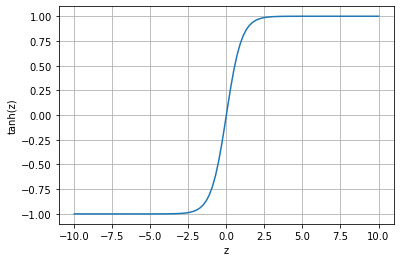

In [2]:
z = np.linspace(-10, 10, 100)
y = np.tanh(z)
plt.plot(z,y)
plt.xlabel("z")
plt.ylabel("tanh(z)")
plt.grid() 
plt.show()

รูปที่ 2.13 กราฟของฟังก์ชันไฮเพอร์โบลิกแทนเจนต์

ปัญหาประการหนึ่งของการใช้ฟังก์ชันซิกมอยด์หรือไฮเพอร์โบลิกแทนเจนต์คือเมื่อ $z$ มีค่ามาก ค่าอนุพันธ์จะมีค่าเข้าใกล้ศูนย์ 
ทำให้แต่ละขั้นของการปรับค่าพารามิเตอร์โดยขั้นตอนวิธีการลดค่าเกรเดียนต์มีค่าน้อย ผลคือโมเดลเรียนรู้ช้า ปัญหานี้รู้จักกันในชื่อ
การหายไปของเกรเดียนต์ (vanishing gradient)
ในการแก้ปัญหานี้ ฟังก์ชันกระตุ้นรูปแบบหนึ่งที่นิยมใช้ในชั้นแฝงของโมเดล DNN คือ ReLU ย่อมาจาก rectifier linear units มีนิยามดังนี้

$$
f(z) = max(0,z) \tag{2.34}
$$

สามารถพล็อตฟังก์ชัน ReLU ได้ดังรูปที่ 2.14

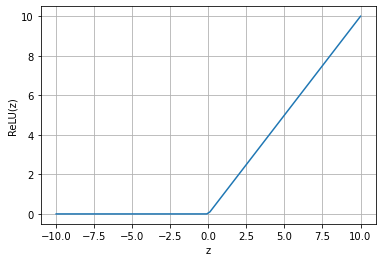

In [3]:
def ReLU(z):
    return z*(z>0)

z = np.linspace(-10, 10, 100)
y = ReLU(z)
plt.plot(z,y)
plt.xlabel("z")
plt.ylabel("ReLU(z)")
plt.grid() 
plt.show()

รูปที่ 2.14 กราฟของฟังก์ชัน ReLU

เหตุผลที่ ReLU ได้รับความนิยมเพราะความง่ายในการคำนวณสำหรับขั้นตอนการแพร่กระจายย้อนหลัง และมีความต้านทานต่อปัญหาการหายไปของเกรเดียนต์ 
ถึงแม้ว่าในเชิงวิเคราะห์ทางทฤษฎี ฟังก์ชัน ReLU มีจุดที่ไม่ต่อเนื่องที่ $z = 0$ 
ทำให้ไม่สามารถหาค่าอนุพันธ์ได้ที่จุดนั้น แต่ในทางปฏิบัติแล้วการที่ค่าของ $z$ จะเท่ากับศูนย์อย่างสมบูรณ์นั้นแทบเป็นไปไม่ได้เลย ตัวอย่างเช่นค่าที่ใกล้เคียงศูนย์ 
เช่น $10^{-16},\; -10^{-14}$สามารถหาอนุพันธ์ได้เท่ากับ 1 และ 0 ตามลำดับ

สังเกตว่าอนุพันธ์ของ ReLU สำหรับค่า $z$ ที่เป็นลบจะมีค่าเท่ากับศูนย์ เวอร์ชันหนึ่งของ ReLU ที่ไม่ต้องการค่าอนุพันธ์ที่เป็นศูนย์เรียกว่า Leaky ReLU 
มีนิยามคือ

$$
f(z) = max(\alpha z,z) \tag{2.35}
$$

โดย $\alpha$ มีค่าน้อย ตัวอย่างกราฟของ Leaky ReLU เมื่อ $\alpha = 0.01$  แสดงดังในรูปที่ 2.15

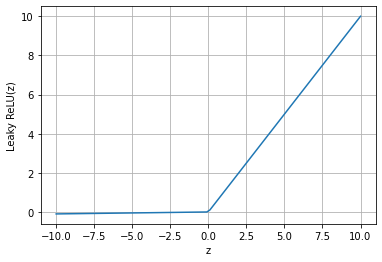

In [4]:
def LeakyReLU(z):
    return np.where(z>0, z, z*0.01)
z = np.linspace(-10, 10, 100)
y = LeakyReLU(z)
plt.plot(z,y)
plt.xlabel("z")
plt.ylabel("Leaky ReLU(z)")
plt.grid() 
plt.show()


รูปที่ 2.15 กราฟของฟังก์ชัน Leaky ReLU

### 2.3.5 การลดค่าเกรเดียนต์สำหรับ DNN ชั้นแฝงเดี่ยว

ก่อนจะอธิบายแผนภาพการคำนวณในส่วนการแพร่กระจายย้อนกลับเพื่อลดค่าเกรเดียนต์สำหรับ DNN ชั้นแฝงเดี่ยว จะสรุปสัญกรณ์ที่ใช้อีกครั้งหนึ่ง 
จากเดิมที่เราใช้ $n_x$ แทนจำนวนของอินพุต หลังจากได้ใช้วงเล็บสี่เหลี่ยมยกกำลังในการระบุหมายเลขชั้น จะยังคงใช้อักขระ $n$ 
แทนจำนวนของอินพุต เซลล์ในชั้นแฝง และเอาต์พุต ซึ่งแทนด้วย $n^{[0]},\;n^{[1]},\;n^{[2]}$ ตามลำดับ 

พารามิเตอร์ของ DNN คือค่าน้ำหนักและค่าเอนเอียงในรูปเมทริกซ์/เวกเตอร์  $W^{[1]},\;b^{[1]},\;W^{[2]},\;b^{[2]}$ 
มีขนาด $n^{[1]} \times n^{[0]},\; n^{[1]} \times 1,\;n^{[2]} \times n^{[1]},\; n^{[2]} \times 1$ 
ตามลำดับ จากปัญหาการจำแนกทวิภาคที่กำลังกล่าวถึงอยู่ขณะนี้จะได้ว่า $n^{[0]} = n_x$ และ $n^{[2]}=1$

ฟังก์ชันมูลค่าเขียนบรรยายได้เป็น

$$
J(W^{[1]},b^{[1]},W^{[2]},b^{[2]}) = \frac{1}{m}\sum_{i=1}^m\mathcal{L}(\hat{y},y) \tag{2.40}
$$

เริ่มต้นขั้นตอนวิธีโดยกำหนดค่าเริ่มต้นของค่าน้ำหนักและค่าเอนเอียงแบบสุ่ม (ห้ามกำหนดเป็นศูนย์เพราะความสมมาตรจะทำให้โมเดลไม่เรียนรู้) 
ใน 1 รอบของการฝึกประกอบด้วยการแพร่กระจายข้างหน้า

$$
\begin{split}
Z^{[1]} &= W^{[1]}X + b^{[1]} \\
A^{[1]} &= g^{[1]}(Z^{[1]}) \\
Z^{[2]} &= W^{[2]}A^{[1]} + b^{[2]} \\
A^{[2]} &= g^{[2]}(Z^{[2]}) = \sigma(Z^{[2]})
\end{split}
$$

เขียนเป็นคำสั่งไพธอนตามขั้นตอนวิธี 2.1 โดยตั้งชื่อตัวแปร <code>Zl, Wl, bl, Al, gl</code> 
แทน $Z^{[l]},\;W^{[l]},\;b^{[l]},\;A^{[l]},\;g^{[l]}$ ตามลำดับ โดยค่าของ <code>gl</code> 
คือเอาต์พุตของฟังก์ชันกระตุ้นของชั้น $l$ เช่น <code>g1 = ReLU(z1), g2 = sigmoid(Z2)</code>

```python
Z1 = W1@X + b1
A1 = g1
Z2 = W2@A1 + b2
A2 = g2
```

ขั้นตอนวิธี 2.1 การแพร่กระจายข้างหน้าสำหรับ DNN ชั้นแฝงเดี่ยว

และการแพร่กระจายย้อนหลัง เขียนเป็นคำสั่งไพธอนได้ตามขั้นตอนวิธี 2.2 โดยตั้งชื่อตัวแปร 
<code>dZl = </code>$\frac{\partial J}{\partial Z^{[l]}}$, <code>dWl = </code>$\frac{\partial J}{\partial W^{[l]}}$
<code>dbl = </code>$\frac{\partial J}{\partial b^{[l]}}$, <code>gprimel = </code>$g'^{[l]}(z^{[l]})$

```python
dZl = A2 - Y 
dW2 = (1/m)*dZ2@A1.T
db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)
dZ1 = W2.T@dZ2*gprime1
dW1 = (1/m)*dZ1@X.T
db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
```

ขั้นตอนวิธี 2.2 การแพร่กระจายย้อนหลังสำหรับ DNN ชั้นแฝงเดี่ยว


รายละเอียดการคำนวณอนุพันธ์สำหรับการแพร่กระจายย้อนหลังทิ้งให้เป็นแบบฝึกหัดสำหรับผู้อ่าน

**ตัวอย่าง 2.3**

ในตัวอย่างนี้จะแสดงการสร้าง DNN ชั้นแฝงเดี่ยวโดยเขียนโค้ดภาษาไพธอนเพื่อจำแนกข้อมูล 2 ชนิดที่เป็นจุดปะปนกันในระนาบ
2 มิติ โดยแสดงความแตกต่างอย่างเด่นชัดเมื่อเปรียบเทียบกับการใช้โมเดลการถดถอยเชิงเส้น 
สำหรับการกำเนิดข้อมููลจะใช้ไลบรารี sklearn ซึ่งได้นำเข้าในโค้ดเซลล์แรกของบทนี้ ไลบรารีนี้มีข้อมูลให้ทดลองหลายชนิด 
ในตัวอย่างนี้เลือก Gaussian quantiles ลักษณะของจุดข้อมูล 400 ตัวอย่างเป็นดังรูปที่ 2.16 

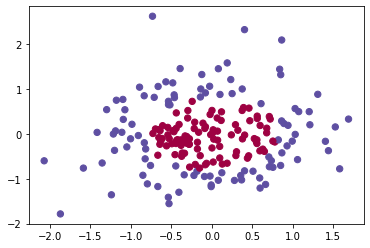

In [5]:
N = 200
gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, 
            n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
X, Y = gaussian_quantiles
X, Y = X.T, Y.reshape(1, Y.shape[0])
# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

รูปที่ 2.16 ข้อมูล Gaussian quantiles ที่ต้องการจำแนกประเภท

จากตำแหน่งของข้อมูลจะเห็นว่าจุดสีแดงรวมตัวอยู่ส่วนกลาง ส่วนสีน้ำเงินกระจายอยู่โดยรอบ โดย $X$ คือพิกัดของจุดข้อมูลใน 
2 มิติ และ $Y$ คือเลเบลทวิภาคที่แทนด้วยสี (0 = แดง, 1 = น้ำเงิน)

ในขั้นแรกจะทดลองจำแนกประเภทโดยใช้โมเดลการถดถอยลอจิสติก ซึ่งสามารถสร้างได้โดยฟังก์ชันจากไลบรารี sklearn 
ใช้โค้ดดังนี้ในการสร้างและฝึกโมเดล

In [6]:
LR_model = sklearn.linear_model.LogisticRegressionCV();
LR_model.fit(X.T, Y.T.reshape(-1));

ใช้ฟังก์ชันสนับสนุน plot_decision_boundary() เพื่อแสดงเส้นแบ่งเขตการจำแนกโดยโมเดลการถดถอยลอจิสติก 
ได้ผลดังแสดงในรูปที่ 2.17

In [7]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)


Accuracy of logistic regression: 51.0 %


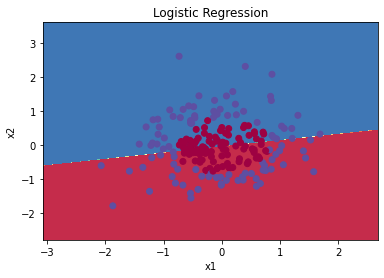

In [8]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: LR_model.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LRresults = LR_model.predict(X.T)

print ('Accuracy of logistic regression: ' + str(float(Y@LRresults.T + (1-Y)@(1-LRresults.T))/float(Y.size)*100) + ' %')


รูปที่ 2.17 เส้นแบ่งเขตการจำแนกข้อมูลจากโมเดลการถดถอยลอจิสติก

จากรูปที่ 2.17 จะเห็นว่าการถดถอยลอจิสติกพื้นฐานไม่สามารถแก้ปัญหานี้ได้อย่างมีประสิทธิภาพ ทั้งนี้เนื่องจากข้อมูลมีลักษณะที่ไม่เป็นเชิงเส้น 
จะทดลองใช้ DNN ที่มีเซลล์ประสาท 4 หน่วยคล้ายดังในรูปที่ 2.11 เพียงแต่ในโจทย์นี้จำนวนอินพุตเท่ากับ 2 
เลือกฟังก์ชันกระตุ้นที่เอาต์พุตชั้นแฝงเป็นแบบ tanh() และที่เอาต์พุตขั้นสุดท้ายเป็น $\sigma()$ 

หาค่าจำนวนของอินพุตและเอาต์พุตจากข้อมูล และกำหนดจำนวนเซลล์ของชั้นแฝง ตั้งชื่อตัวแปรเป็น 
<code>n_x, n_y, n_h</code>ตามลำดับ

In [9]:
n_x = X.shape[0] # input layer size
n_h = 4 # neurons in hidden layer
n_y = Y.shape[0] # output layer size
print("n_x = {}, n_h = {}, n_y = {}".format(n_x,n_h,n_y))

n_x = 2, n_h = 4, n_y = 1


ตั้งค่าเริ่มต้นให้กับพารามิเตอร์โมเดล โดยค่าน้ำหนักจะตั้งค่าแบบสุ่มและลดค่าโดยคูณด้วยค่าน้อยเช่น 0.01
ส่วนค่าเอนเอียงสามารถตั้งเป็นศูนย์ได้ (หากตั้งค่าน้ำหนักเริ่มต้นเป็นศูนย์ จะเกิดปัญหาจากความสมมาตรของโครงข่าย) 
เขียนเป็นฟังก์ชัน ```init_params()``` ที่คืนค่าเป็นดิกชันนารีของพารามิเตอร์ดังนี้

In [10]:
def init_params(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01 
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters    

In [11]:
params = init_params(n_x, n_h, n_y)

สำหรับฟังก์ชันกระตุ้นที่ใช้ในชั้นแฝงได้จากไลบรารี ```np.tanh()``` เหลือเพียงเขียนฟังก์ชันกระตุ้น 
```sigmoid()``` เพื่อใช้ในเอาต์พุตขั้นสุดท้ายของโมเดล  

In [12]:
def sigmoid(z):
    y = 1/(1+np.exp(-z))
    return y

มาถึงขั้นนี้เราพร้อมที่จะเขียนโค้ดสำหรับแผนภาพการคำนวณในแต่ละรอบการฝึก 
เริ่มจากเขียนฟังก์ชัน ```fw_prop()``` สำหรับคำนวณการแพร่กระจายข้างหน้าโดยใช้เค้าโครงของโค้ดตามขั้นตอนวิธี 2.1 
โดยฟังก์ชันนี้รับอาร์กิวเมนต์เป็นข้อมูลอินพุต <code>X</code> และดิกชันนารีของพารามิเตอร์ <code>parameters</code>
เมื่อคำนวณการแพร่กระจายข้างหน้าแล้วจะคืนค่าเอาต์พุตของชั้นสุดท้าย <code>A2</code> และดิกชันนารี <code>cache</code> 
ที่ใช้ในการคำนวณการแพร่กระจายย้อนหลัง

In [14]:
def fw_prop(X, parameters):
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = W1@X + b1
    A1 = np.tanh(Z1)
    Z2 = W2@A1 + b2
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

เมื่อได้เอาต์พุต <code>A2</code> ซึ่งเป็นการคำนวณแบบเวกเตอร์ที่รวมทุกตัวอย่างในการฝึก เราสามารถคำนวณฟังก์ชันมูลค่า (2.6) โดยเขียนเป็นฟังก์ชัน 
<code>compute_cost()</code>ดังนี้

In [15]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1] # number of example
    logprobs = Y@np.log(A2).T + (1-Y)@np.log(1-A2).T
    cost = np.squeeze(np.float64(-logprobs /m))
    return cost
    

สำหรับขั้นตอนวิธีการแพร่กระจายย้อนหลัง ซึ่งเป็นส่วนที่มีความซับซ้อนเชิงคณิตศาสตร์ที่สุดสำหรับปัญหาการเรียนรู้เชิงลึก จะใช้เค้าโครงตามขั้นตอนวิธี 2.2 
เขียนเป็นฟังก์ชัน <code>bw_prop()</code> ได้ดังนี้

In [16]:
def bw_prop(parameters, cache, X, Y):
    m = X.shape[1]

    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    avg_m = 1/m 
    dZ2 = A2 - Y
    dW2 = avg_m*dZ2@A1.T
    db2 = avg_m*np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = (W2.T@dZ2) * (1 - np.power(A1, 2))
    dW1 = avg_m*dZ1@X.T
    db1 = avg_m*np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads    

โดยสังเกตว่า <code>bw_prop()</code> จะต้องการอาร์กิวเมนต์ <code>cache</code> ที่เป็นเอาต์พุตของ 
<code>fw_prop()</code> เมื่อคำนวณค่าการเปลี่ยนแปลงของพารามิเตอร์ในแต่ละขั้นได้แล้ว เขียนฟังก์ชัน <code>update_params()</code> 
เพื่อปรับค่าพารามิเตอร์ โดยมีอาร์กิวเมนต์สำหรับปรับค่าอัตราการเรียนรู้

In [17]:
def update_params(parameters, grads, learning_rate = 1.2):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}   
    return parameters

รวมฟังก์ชันย่อยทั้งหมดเพื่อสร้างโมเดล เขียนเป็นฟังก์ชัน <code>dnn1l_model()</code> 
ในตัวอย่างนี้เราจะให้จำนวนเซลล์ของชั้นแฝงเป็นอาร์กิวเมนต์เพื่อสามารถดูผลการจำแนกเมื่อแปรค่าจำนวนเซลล์ 

In [18]:
def dnn1l_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    n_x = X.shape[0] # input layer size
    n_y = Y.shape[0] # output layer size    

    parameters = init_params(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    for i in range(0, num_iterations):
        A2, cache = fw_prop(X, parameters) # forward propagation
        cost = compute_cost(A2, Y, parameters)
        grads = bw_prop(parameters, cache, X, Y) # backward propagation
        parameters = update_params(parameters, grads) # parameter update
 
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

ฟังก์ชันสุดท้ายคือ <code>predict()</code>สำหรับการพยากรณ์เอาต์พุต ตามเงื่อนไขดังนี้

$$
\hat{y} = \left\{ \begin{matrix}
1 & a^{[2]}>0.5 \\
0 &  \textrm{otherwise} \end{matrix} \right.              
$$

In [19]:
def predict(parameters, X):
    A2, cache = fw_prop(X, parameters)
    predictions = (A2 > .5)
    return predictions

เมื่อเขียนฟังก์ชันย่อยครบทั้งหมดแล้ว เราพร้อมที่จะทดสอบโมเดลกับข้อมูล Gaussian quantiles ในรูปที่ 2.16 โดยเริ่มจากโมเดลที่มีจำนวนเซลล์ในชั้นแฝงเท่ากับ 4 
สร้างโมเดลและฝึกโดยข้อมูล <code>X,Y</code> โดยใช้ฟังก์ชัน <code>dnn1l_model()</code> ซึ่งจะุคืนค่าตัวแปร <code>parameters</code> 
เพื่อนำมาพยากรณ์ ทั้งหมดเขียนเป็นโค้ดได้ดังเซลล์ด้านล่าง ซึ่งจะพล็อตผลการจำแนกในรูปที่ 2.18

Cost after iteration 0: 0.693152
Cost after iteration 1000: 0.097250
Cost after iteration 2000: 0.052246
Cost after iteration 3000: 0.041846
Cost after iteration 4000: 0.035961
Cost after iteration 5000: 0.031884
Cost after iteration 6000: 0.028790
Cost after iteration 7000: 0.026387
Cost after iteration 8000: 0.024489
Cost after iteration 9000: 0.022946


[]

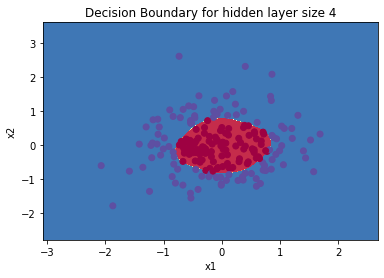

In [20]:
parameters = dnn1l_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(n_h))
plt.plot()

รูปที่ 2.18 ผลการจำแนกข้อมูลจากโมเดล DNN ชั้นแฝงเดี่ยว

เมื่อตรวจสอบค่าของฟังก์ชันมูลค่าที่ถูกพิมพ์ออกทุก 1000 รอบการฝึก จะเห็นว่าลดลงจากค่าเริ่มต้นจนกระทั่งเริ่มเข้าสู่ค่าน้อยและแกว่งอยู่ประมาณค่านั้น 
แสดงว่าขั้นตอนวิธีการลดค่าเกรเดียนต์ทำงานได้ตามที่คาดหวัง อย่างไรก็ตามการปรับค่าอัตราการเรียนรู้จะทำให้ได้ผลที่แตกต่างกัน 
หรืออาจทำให้ขั้นตอนวิธีไม่เสถียรก็ได้

เมื่อเปรียบเทียบผลการจำแนกข้อมูลจากการพยากรณ์โดยโมเดล DNN ชั้นแฝงเดี่ยวในรูปที่ 2.18 กับผลจากโมเดลการถดถอยลอจิสติกในรูปที่ 2.17 
จะแสดงได้ถึงข้อได้เปรียบในการเพิ่มชั้นแฝงให้กับโมเดล โดยจากข้อมูลจุดสีแดงจะกระจุกตัวอยู่บริเวณใจกลางของระนาบ ส่วนจุดสีฟ้าจะกระจายอยู่โดยรอบ 
การแบ่งขอบเขตจากโมเดล DNN สามารถจำแนกพื้นที่บนระนาบที่มีข้อมูลจุดสีแดงและสีฟ้าได้อย่างเหมาะสม 
ในขณะที่การจำแนกโดยโมเดลการถดถอยลอจิสติกจะได้ขอบเขตเป็นเส้นตรงที่ไม่สามารถจำแนกข้อมูลจากโจทย์นี้ได้อย่างมีประสิทธิภาพ

เมื่อคำนวณหาความแม่นยำในการจำแนกประเภทจะเห็นได้ว่ามีสัดส่วนในการพยากรณ์ถูกต้องดีกว่าโมเดลการถดถอยลอจิสติกอย่างเด่นชัด

In [23]:
results = predict(parameters, X)
print ('Accuracy: ' + str(float(Y@results.T + (1-Y)@(1-results.T))/float(Y.size)*100) + '%')

Accuracy: 100.0%


ในฟังก์ชัน <code>dnn1l_model()</code> สามารถป้อนค่าอาร์กิวเมนต์ <code>n_h</code> เป็นจำนวนเซลล์ในชั้นแฝง 
ทำให้เราสามารถศึกษาผลของจำนวนเซลล์ที่มีต่อการจำแนกข้อมูล โดยจะทดลองใส่ค่า <code>n_h = 1, 3, 5, 15</code>
โค้ดในเซลล์ด้านล่างนี้ใช้การวนรอบเพื่อฝึก 4 โมเดลนี้และพล็อตผลการจำแนกดังแสดงในรูปที่ 2.19

Accuracy for 1 hidden units: 67.0 %
Accuracy for 3 hidden units: 96.5 %
Accuracy for 5 hidden units: 99.0 %
Accuracy for 15 hidden units: 100.0 %


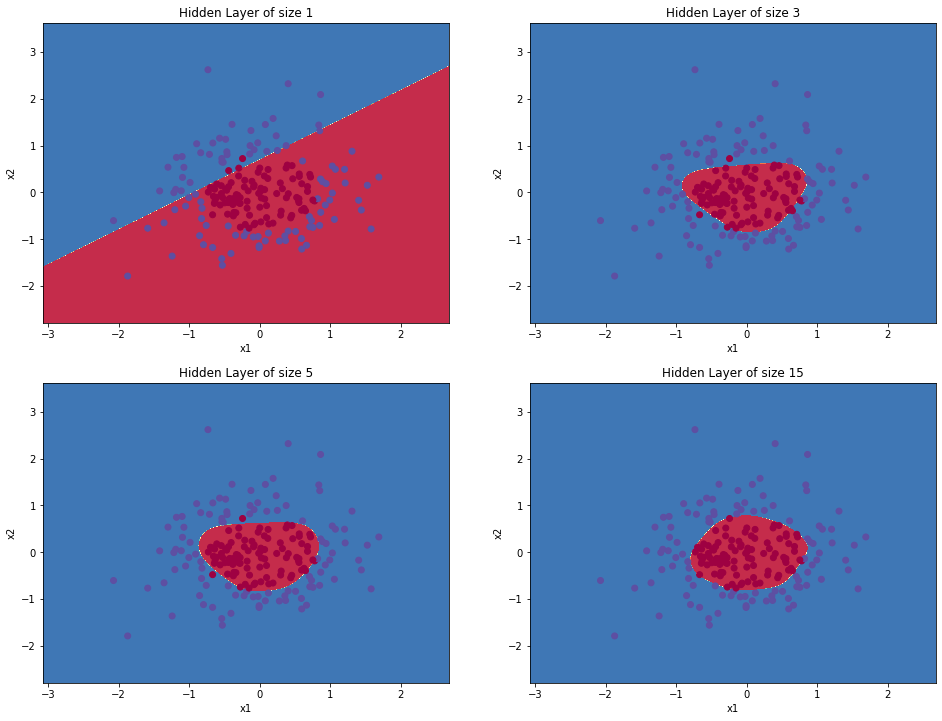

In [24]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1,3,5,15]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = dnn1l_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float(Y@predictions.T + (1-Y)@(1-predictions.T))/float(Y.size)*100
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

รูปที่ 2.19 ผลของจำนวนเซลล์ในชั้นแฝงที่มีต่อการจำแนกข้อมูล

จากผลที่ได้ในรูปที่ 2.19 และค่าความแม่นยำที่พิมพ์ออกเอาต์พุต จะเห็นว่าการเพิ่มจำนวนเซลล์ในชั้นแฝงสามารถช่วยปรับปรุงผลการจำแนกได้ 
ผู้อ่านสามารถเปลี่ยนค่าของ <code>n_h</code> ในโค้ดด้านบนเพื่อเลือกโมเดลที่ดีที่สุด ซึ่งในการรันแต่ละครั้งจะให้ผลที่แตกต่างกัน


<p align="center">
<img src="https://drive.google.com/thumbnail?id=13bzT7Rmy3bzvE7TiS0yfQo94kpxMuipF" alt="dewninja"/>
</p>
<div align="center">dew.ninja 2022</div>